<h1>Circle Geometry Attempt in Cartesian Coordinates</h1>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eig
import itertools

In [129]:
# Boundary Circle

# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 101)

# the radius of the circle

x_origin = 0
y_origin = 0

r_boundary = np.sqrt(0.6)

# Compute x and y: ALL of x and y are inside the boundary 
x_boundary = r_boundary*np.cos(theta)
y_boundary = r_boundary*np.sin(theta)

Nx_boundary = np.size(x_boundary)
Ny_boundary = np.size(y_boundary)


# Make x,y grid 
x_upper_lim = 1.0
x_lower_lim = -1.0

y_upper_lim = 1.0
y_lower_lim = -1.0

# Number of grid points

Nx = 100
Ny = 100

x = np.linspace(x_lower_lim,x_upper_lim,Nx) # Mesh
y = np.linspace(y_lower_lim,y_upper_lim,Ny)

dx = x[1] - x[0] # Mesh Size
dy = y[1] - y[0]

# Create Meshgrid: 

X, Y = np.meshgrid(x, y) # X is size x^2, Y is size y^2

# Define general r values from X and Y

r = np.sqrt((X - x_origin)**2 + (Y - y_origin)**2)

# Define grid points that are inside/outside the circle - returns boolean matrix 

outside = r > r_boundary

inside = r <= r_boundary

# Initialise matrices

N = Nx*Ny # no. of unknowns

M = np.zeros((N,N)) # N rows, N columns
M.astype(float)

# Boundaries 

# Points defined by X[outside], Y[outside]
# Using Dirichlet conditions where z = 0 outside the circle, our zeroes matrix already meets this condition

x_outside = X[outside]
y_outside = Y[outside]

# Interiors

x_inside = X[inside]
y_inside = Y[inside]

# Want to say:
# For the x_inside points and y_inside points of X and Y 


for i in range(0,Nx):
    for j in range(0,Ny):
        if inside[i][j] == True:
            n = i+j*Nx
            M[n,n] = -2*((1/(dx)**2) + (1/(dy)**2)) # Main diagonal
            M[n,n-1]=1/((dx)**2) # Off diagonal to the left ie. point i-1, j
            M[n,n+1]=1/((dx)**2) # Off diagonal to the right ie. point i+1, j
            M[n,n-Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j-1
            M[n,n+Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j+1
            
# Solve for z
alpha,z = eig(M)

alpha = np.real(alpha)
z = np.real(z)

print('E-value:', alpha)

E-value: [-19592.53257231 -19577.97386796 -19552.16929061 ...      0.
      0.              0.        ]


In [130]:
# Function which returns the reshaped eigenvector which corresponds to whatever eigenmode is inputted
def get_eigenvector(arr, eigenstate):
    index = np.argwhere((abs(arr)==np.sort(abs(arr))[eigenstate]) & (np.round(np.sort(abs(arr))[eigenstate], 6)!=0))
    if index.size>0:
        return np.reshape(z[:,index[0]], (Nx,Ny))

In [131]:
# Returns first non-zero element of array
sorted = np.sort(abs(alpha))
first_nonzero = next((i for i, x in enumerate(sorted) if x), None)

z_num = 0
for i in range((first_nonzero+6)):
    eigenvector = get_eigenvector(alpha, i)
    if eigenvector is not None:
        globals()["z_" + str(z_num)] = eigenvector
        z_num += 1

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

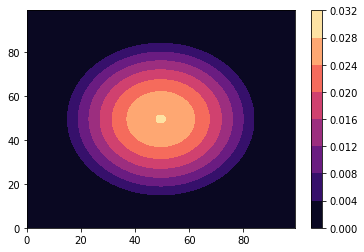

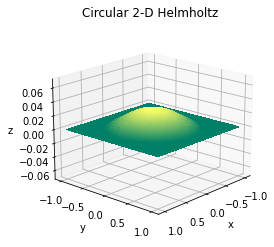

In [132]:
ax = plt.contourf(z_0, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_0, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

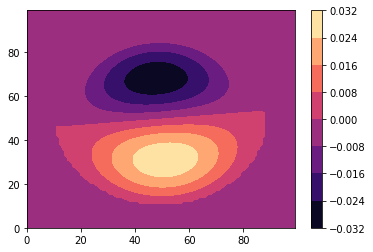

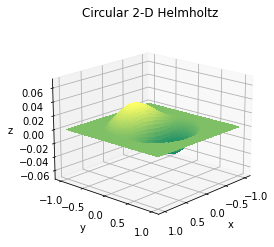

In [133]:
ax = plt.contourf(z_1, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_1, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

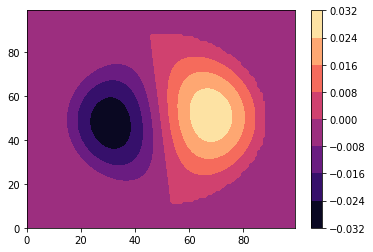

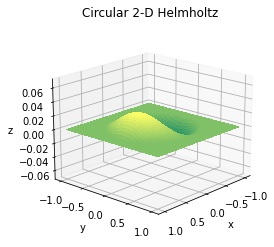

In [134]:
ax = plt.contourf(z_2, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_2, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

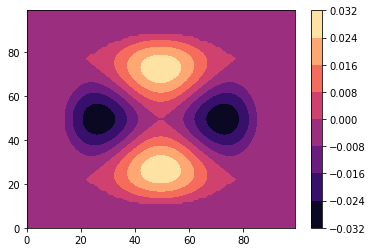

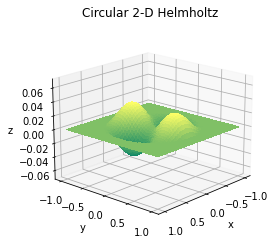

In [135]:
ax = plt.contourf(z_3, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_3, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

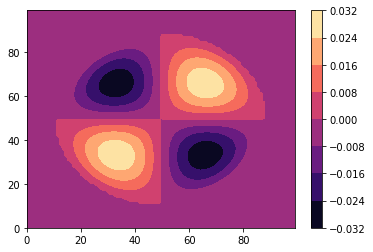

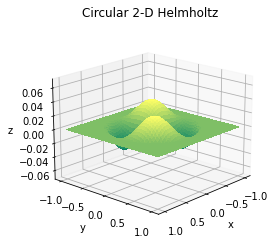

In [136]:
ax = plt.contourf(z_4, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_4, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

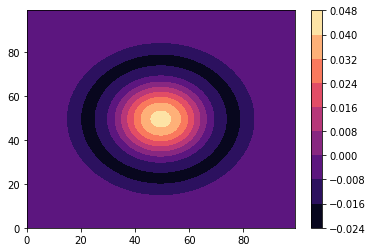

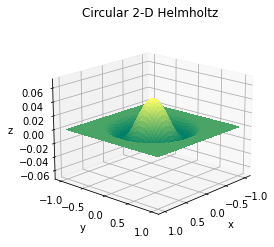

In [137]:
ax = plt.contourf(z_5, cmap='magma')
cb = plt.colorbar(ax)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z_5, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

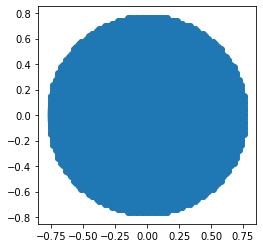

In [138]:
# create the figure
fig, ax = plt.subplots(1)
ax.plot(x_boundary, y_boundary)
ax.set_aspect(1)
# plt.plot(X, Y, marker='.', color='k', linestyle='none')
# ax.scatter(X[outside], Y[outside])
ax.scatter(X[inside], Y[inside])
plt.show()